In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
plt.style.use('ggplot')

%matplotlib inline

plotly.offline.init_notebook_mode()

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [47]:
from src.Cleaner import *

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.15 (from versions: none)
ERROR: No matching distribution found for tensorflow-gpu==1.15


In [3]:
df = pd.read_csv('data/Colorectal_GSE44076.csv')

In [4]:
df.groupby('type')['type'].count()

type
adenocarcinoma    97
normal            97
Name: type, dtype: int64

In [5]:
target_labels = labels(df)
target_labels

['normal', 'adenocarcinoma']

In [6]:
cleaned_df = data_cleaner(df)
cleaned_df.head()

,target,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,...,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,4.033083,3.991328,3.522487,3.278373,7.201681,2.166355,2.841044,2.217360,2.066134,...,2.233052,2.321627,2.602364,2.272951,8.236181,4.766301,6.624126,2.191907,2.089431,2.196678
1,1,3.117273,4.047258,3.042704,3.284518,8.425413,2.139838,2.632561,2.375537,2.417156,...,2.033923,2.335442,2.061999,1.979024,7.079312,4.687041,5.775218,2.013578,2.189192,2.106554
2,1,3.513162,4.154993,3.067877,3.478020,7.337592,2.070858,2.632643,2.542989,2.371663,...,1.874741,2.522885,2.577079,2.017303,6.966157,3.498785,5.384117,2.124996,2.175054,2.168932
3,1,3.487588,4.505968,3.688899,3.642465,7.319168,2.191685,2.567842,2.551201,2.517034,...,1.795535,2.147798,2.439898,2.157677,8.899968,6.943802,7.908001,1.969787,2.125711,2.311073
4,1,3.096174,3.997803,3.404045,2.984088,7.652969,2.374705,2.178836,2.852997,2.407605,...,1.965137,2.655806,2.330900,2.230463,7.878767,5.718627,6.654383,2.015329,2.339691,2.347252


In [7]:
X = cleaned_df.drop(columns='target')
y = cleaned_df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35)

In [9]:
#Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

32


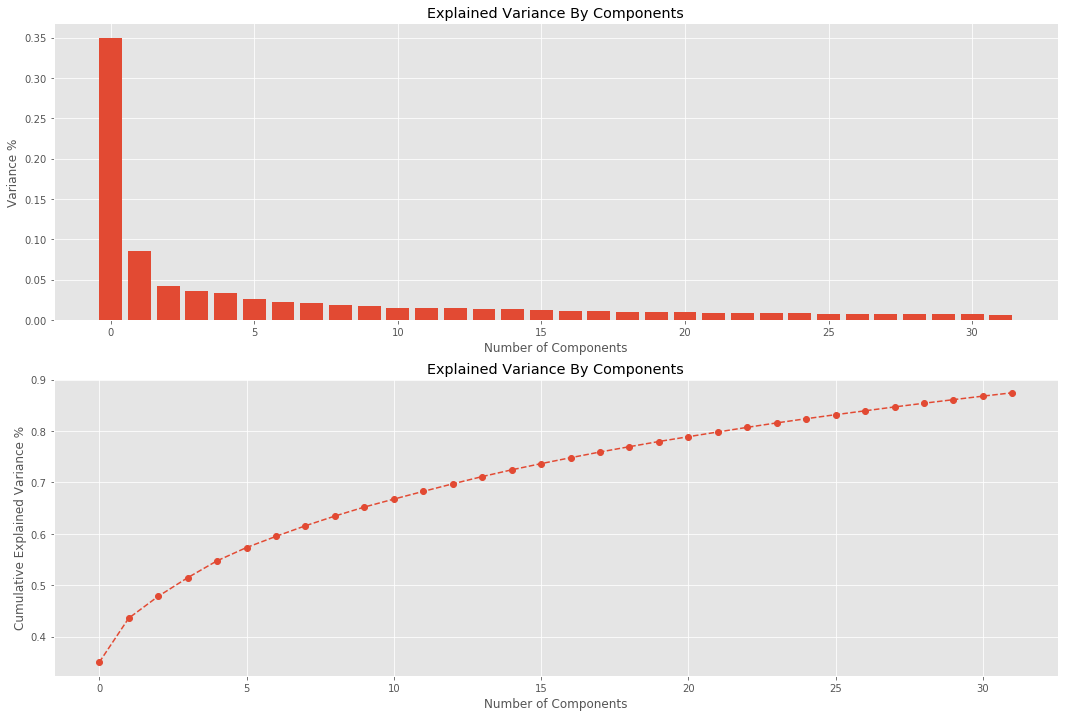

In [10]:
pcd = PCA()
pcd.fit_transform(X_train)
total_variance = sum(pcd.explained_variance_)
curr_variance = 0
k = 0
while curr_variance/total_variance < .80:
    curr_variance += pcd.explained_variance_[k]
    k += 1
    

features = range(k)
pcd = PCA(n_components=k)
X_train_pca = pcd.fit_transform(X_test)
X_test_pca = pcd.transform(X_test)

variance = pcd.explained_variance_ratio_
cumsum_variance = pcd.explained_variance_ratio_.cumsum()

fig, axs = plt.subplots(2,1, figsize=(18,12))
ax = axs.flatten()
ax[0].bar(features, variance)
ax[0].set_ylabel('Variance %')
ax[0].set_xlabel('Number of Components')
ax[0].set_title('Explained Variance By Components')


ax[1].plot(features, cumsum_variance, marker='o', linestyle='--')
ax[1].set_ylabel('Cumulative Explained Variance %')
ax[1].set_xlabel('Number of Components')
ax[1].set_title('Explained Variance By Components')
print(k)

In [38]:
pca3 = PCA(n_components=3).fit(X_train)
reduced_X_train = pca3.transform(X_train)

fig = px.scatter_3d(reduced_X_train, x=reduced_X_train[:,0], y=reduced_X_train[:,1], z=reduced_X_train[:,2], color=y_train)

plotly.offline.iplot(fig)

## Starting with a baseline Model

### Neural Network